In [1]:
import datastore

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

spot = datastore.getSpotPrice()

cons_gwh = datastore.getTotalConsumption()

production_se1_mwh = datastore.getAllSE1ProductionMWh() 
production_se2_mwh = datastore.getAllSE2ProductionMWh()
production_se3_mwh = datastore.getAllSE3ProductionMWh()
production_se4_mwh = datastore.getAllSE4ProductionMWh()
# nuclear_finland_germany_mwh = datastore.getHourlyProduction_nuclear_EU()
# germany_all = datastore.getHourlyProduction_Germany_all()

temp_pen = datastore.getDailyWeather()
hydroReservoirs = datastore.getWeeklyHydroReservs()
wind_velocities = datastore.getHourlyWindVelocity()

transTo = datastore.getTransmissionCapTo()
transFrom = datastore.getTransmissionCapFrom()
netFlow = datastore.getNetFlow()
flowCapacityTo = datastore.getFlowCapacityTo()

# productionCap = datastore.getProductionCap_forecast(

Missing values in Index(['spotPrice'], dtype='object') : 6
Missing values in Index(['ConsumptionGWh'], dtype='object') : 6
Missing values in Index(['waterSE1(MWh)', 'windSE1(MWh)', 'trmSE1MWh'], dtype='object') : 46
Missing values in Index(['waterSE2(MWh)', 'windSE2(MWh)', 'solSE2MWh', 'trmSE2MWh', 'OthSE2MWh'], dtype='object') : 144
Missing values in Index(['waterSE3(MWh)', 'windSE3(MWh)', 'nucSE3(MWh)', 'solSE3MWh',
       'trmSE3MWh', 'OthSE3MWh'],
      dtype='object') : 139
Missing values in Index(['waterSE4(MWh)', 'windSE4(MWh)', 'solSE4MWh', 'trmSE4MWh', 'OthSE4MWh'], dtype='object') : 155
Missing values in Index(['Temperature(day)', 'PrecipitationEnergySE(day)'], dtype='object') : 24
Missing values in Index(['HydroRes(GWh_week)', 'HydroResSE3(GWh_week)'], dtype='object') : 288
Missing values in Index(['Wind(Pite)', 'Wind(Mal)', 'Wind(Vmark)', 'Wind(Juns)', 'Wind(Upps)'], dtype='object') : 4549
Missing values in Index(['TDK1SE3', 'TNO1SE3', 'TSE2SE3', 'TF1SE3', 'TSE4SE3'], dtype

<Axes: xlabel='Year', ylabel='spotPrice'>

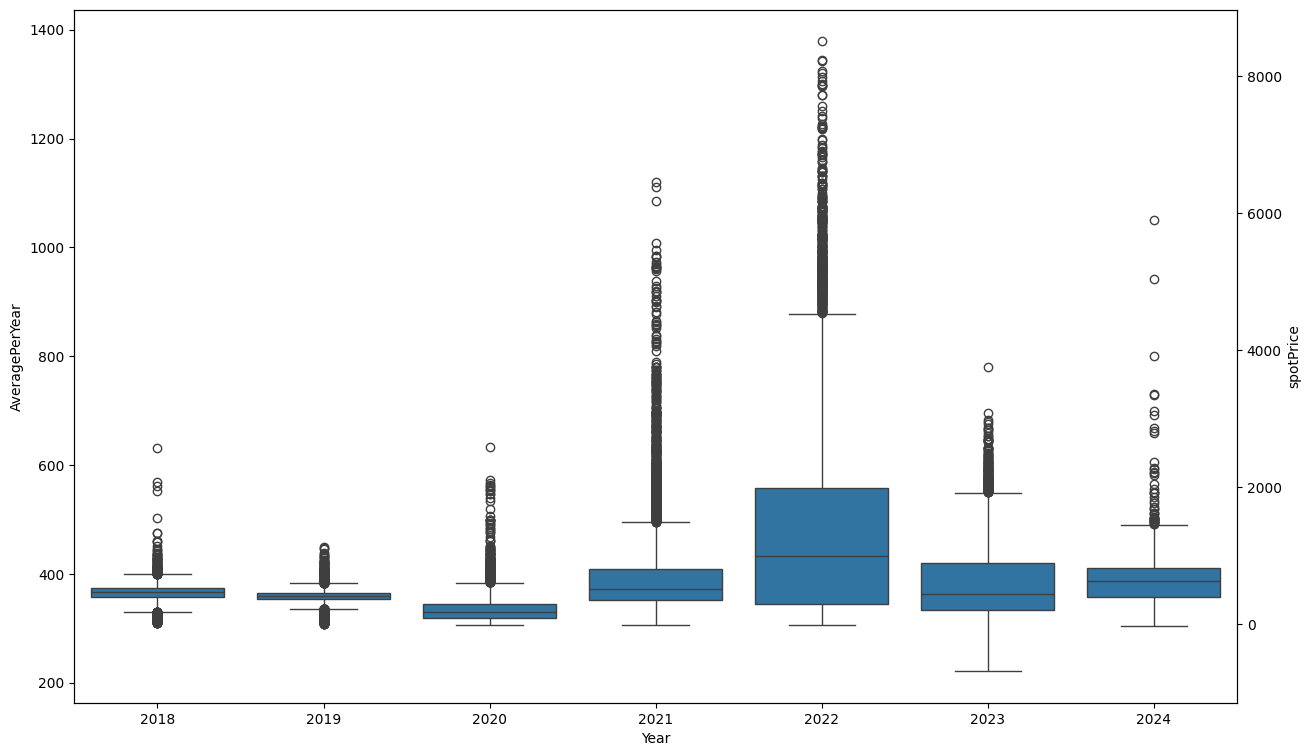

In [61]:
import seaborn as sns

# Figure size and title
fig, ax = plt.subplots(figsize=(15,9))


# Create a new column for average spot price per YEAR
spot['AveragePerYear'] = spot['spotPrice'].resample('Y').mean()
spot['Year'] = spot.index.year


sns.lineplot(x="Year", y='AveragePerYear', data=spot, color='red', alpha=0.5, ax=ax)
ax2 = ax.twinx()
sns.boxplot(x="Year", y='spotPrice', data=spot, ax=ax2)

In [ ]:
spot.to_csv('spot.csv')

In [ ]:
import seaborn as sns

temp_pen = temp_pen[(temp_pen.index.year > 2021) & (temp_pen.index.year < 2023)]
wind_velocity = wind_velocity[wind_velocity.index.year < 2024]


plt.figure(figsize=(15, 6))
sns.lineplot(data=temp_pen["PrecipitationEnergySE(day)"].resample("W").mean(), label="Precipitation energy SE")
plt.title("Daily average Precipitation energy, 2018 to 2023")
plt.ylabel("Precipitation energy [MWh]")


In [70]:
production_all = pd.concat([production_se1_mwh, production_se2_mwh, production_se3_mwh, production_se4_mwh], axis=1)

production_all_ = pd.DataFrame()
production_all_['Hydro'] = production_all[['waterSE2(MWh)', 'waterSE1(MWh)', 'waterSE3(MWh)', 'waterSE4(MWh)']].sum(axis=1)
production_all_["Wind"] = production_all[['windSE1(MWh)', 'windSE2(MWh)', 'windSE3(MWh)', 'windSE4(MWh)']].sum(axis=1)
production_all_["Nuclear"] = production_all[['nucSE3(MWh)']]
production_all_["Solar"] = production_all[['solSE2MWh', 'solSE3MWh', 'solSE4MWh']].sum(axis=1)
production_all_["Thermal"] = production_all[['trmSE1MWh', 'trmSE2MWh', 'trmSE3MWh', 'trmSE4MWh']].sum(axis=1)
production_all_["Other"] = production_all[[ 'OthSE2MWh', 'OthSE3MWh', 'OthSE4MWh']].sum(axis=1)

In [ ]:

import seaborn as sns

# production_all_["Month"] = production_all_.index.month
# production_all_["Year"] = production_all_.index.year

# Resample the DataFrame to daily frequency and calculate the mean
daily_mean = production_all_.resample('M').mean()

# Drop rows where the year is 2024
daily_mean = daily_mean[daily_mean.index.year < 2024]



plt.figure(figsize=(18, 8))
sns.lineplot(data=daily_mean , dashes=False, palette="tab10")

plt.title('Total Production by source, from 2018 to 2023')
plt.xlabel('Source')
plt.ylabel('Production (MWh)')

In [58]:
import seaborn as sns
production_all = pd.concat([production_se1_mwh, production_se2_mwh, production_se3_mwh, production_se4_mwh], axis=1)

production_all.describe()

,waterSE1(MWh),windSE1(MWh),trmSE1MWh,waterSE2(MWh),windSE2(MWh),solSE2MWh,trmSE2MWh,OthSE2MWh,waterSE3(MWh),windSE3(MWh),nucSE3(MWh),solSE3MWh,trmSE3MWh,OthSE3MWh,waterSE4(MWh),windSE4(MWh),solSE4MWh,trmSE4MWh,OthSE4MWh
count,54576.000000,54530.000000,54576.000000,54576.000000,54530.000000,54481.000000,54576.000000,54573.000000,54576.000000,54529.000000,54576.000000,54485.000000,54576.000000,54575.000000,54576.000000,54530.000000,54473.000000,54570.000000,54576.000000
mean,2306.029792,468.097607,24.026904,4188.153157,1186.157216,3.568458,116.666052,0.179324,1159.768175,897.755671,6207.283997,51.772639,570.580589,6.764968,149.157766,518.905593,26.227247,141.919481,18.516185
std,969.612656,457.664104,13.389480,1681.026510,1050.834787,8.823227,55.422539,1.408388,425.165904,663.584466,1360.595720,130.002129,333.062557,7.408191,94.108170,412.900212,68.022195,79.069623,19.469970
min,163.420000,1.000000,0.000000,615.670000,8.000000,0.000000,3.420000,0.000000,258.550000,15.000000,2255.880000,0.010000,57.120000,0.020000,1.330000,7.000000,0.010000,16.390000,0.000000
25%,1509.727500,117.000000,12.870000,3328.335000,365.000000,0.020000,76.590000,0.010000,836.562500,362.000000,5266.072500,0.110000,257.487500,0.810000,64.170000,189.000000,0.110000,76.720000,1.170000
50%,2361.645000,308.000000,23.970000,4381.555000,866.000000,0.050000,111.665000,0.030000,1187.535000,740.000000,6261.600000,0.590000,533.345000,5.820000,137.160000,401.000000,0.460000,127.310000,9.670000
75%,3058.157500,687.000000,34.770000,5145.095000,1726.000000,2.090000,157.362500,0.080000,1493.942500,1292.000000,7104.947500,32.850000,810.742500,10.620000,235.560000,752.000000,15.600000,189.517500,31.070000
max,4660.340000,3047.500000,63.540000,257726.280000,6553.000000,79.220000,272.640000,117.610000,2059.200000,4016.000000,8671.270000,1177.070000,1574.810000,190.740000,309.940000,2475.000000,593.670000,661.230000,80.370000


In [20]:
# Extract the year from the Date column
spot['Year'] = spot.index.year

# Group the data by year and calculate descriptive statistics
statistics_per_year = spot.groupby('Year')['spotPrice'].describe()

# Print the statistics per year
statistics_per_year.drop(columns=['25%', '50%', '75%'], inplace=True)
statistics_per_year.to_latex('statistics_per_year.tex')


C:\Users\drami\AppData\Local\Temp\ipykernel_10024\2664559851.py:9: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  statistics_per_year.to_latex('statistics_per_year.tex')


In [22]:
missing_values_per_year = spot.isna().groupby(spot.index.year).sum()
print(missing_values_per_year)

nan_dates = spot[spot['spotPrice'].isna()].index
print(nan_dates)


      spotPrice  Year
Date                 
2018          1     0
2019          1     0
2020          1     0
2021          1     0
2022          1     0
2023          1     0
2024          0     0
DatetimeIndex(['2018-03-25 02:00:00', '2019-03-31 02:00:00',
               '2020-03-29 02:00:00', '2021-03-28 02:00:00',
               '2022-03-27 02:00:00', '2023-03-26 02:00:00'],
              dtype='datetime64[ns]', name='Date', freq=None)


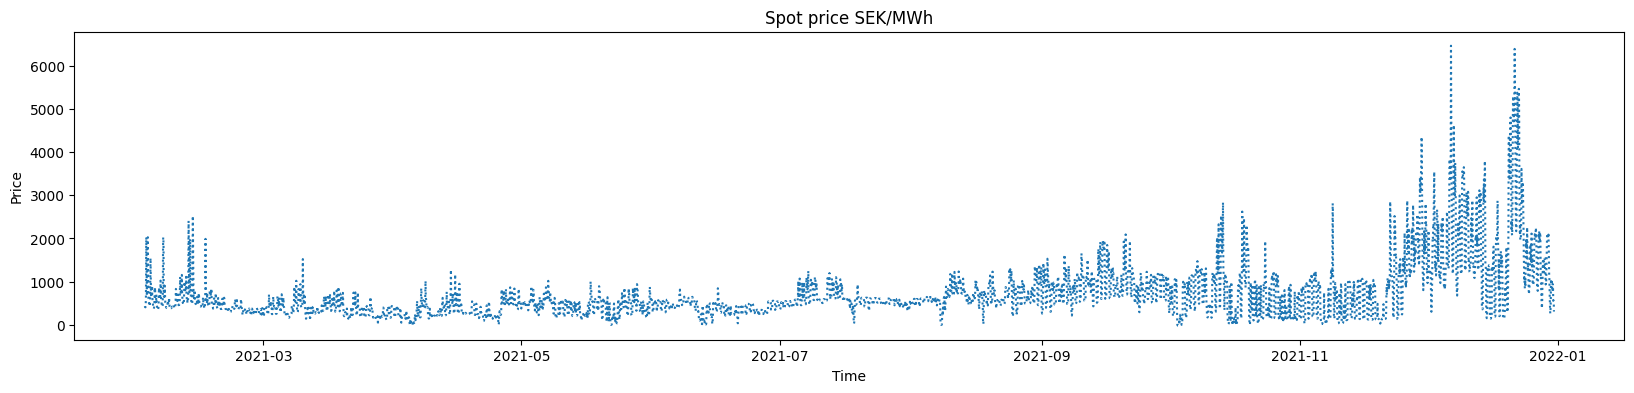

In [2]:
spot2021 = spot[(spot['#Hour'] >= '2021-01-01') & (spot['#Hour'] <= '2021-12-31')]

plt.figure(figsize=(20,4))

plt.plot(spot2021['#Hour'], spot2021['SPOTSE3'], linestyle = 'dotted')
plt.title('Spot price SEK/MWh')
plt.xlabel('Time')
plt.ylabel('Price')

plt.show()

<Axes: >

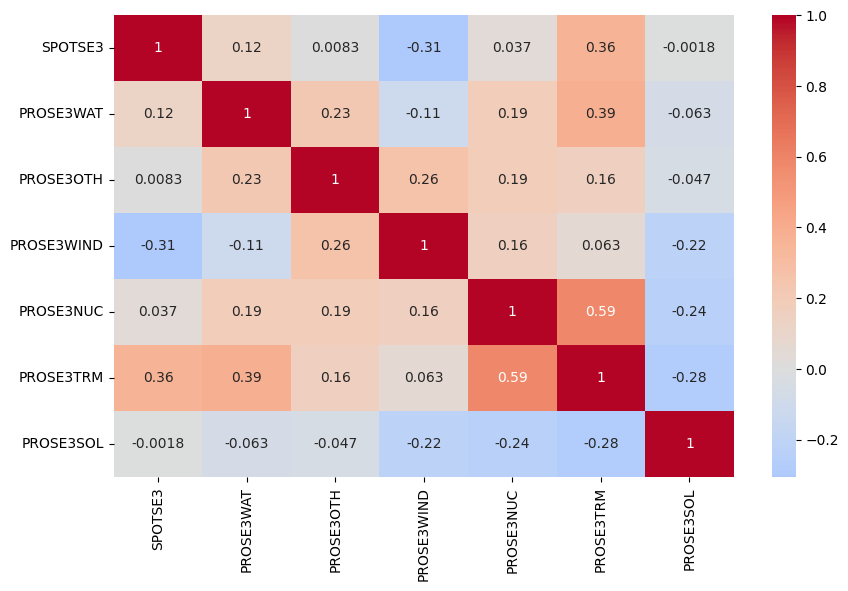

In [17]:
import seaborn as sns

plt.figure(figsize=(10,6))
spot = spot[:26496]

# corr = np.corrcoef(spot['SPOTSE3'], prodM[['PROSE3WAT', 'PROSE3WIND']])
C = pd.concat([spot['SPOTSE3'], prodM.iloc[:, 1:]], axis=1)
corr = C.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm', center=0)

In [ ]:
# The Augmented Dickey-Fuller (ADF) test, a type of unit root test, determines how strongly a time series is defined by a trend. Its hypotheses are the following:

# Null Hypothesis  H0
#  : There is a unit root in the time series, i.e. the series is autocorrelated with (r=1), a time dependent structure and thus, is not stationary.
# Alternate Hypothesis  H1
#  : The time series has no unit root and is either stationary or can be made stationary using differencing.

from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(spot)

print('ADF Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(adf_test[0], adf_test[1], adf_test[2]))
for key, value in adf_test[4].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))

In [ ]:
# The Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test, follows the opposite logic from Augmented Dickey-Fuller test and checks for stationarity. Its hypotheses are the following:

# Null Hypothesis  H0
#  : The time series is level, i.e. it is stationary around a constant.
# Alternate Hypothesis  H1
#  : There is a unit root in the time series and thus it not stationary.

from statsmodels.tsa.stattools import kpss

kpss_test = kpss(spot, regression='c')
print('KPSS Statistic: {:.6f}\np-value: {:.6f}\n#Lags used: {}'
      .format(kpss_test[0], kpss_test[1], kpss_test[2]))
for key, value in kpss_test[3].items():
    print('Critical Value ({}): {:.6f}'.format(key, value))

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Plot autocorrelation and partial autocorrelation plots

fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(10, 6))
plot_acf(spot, lags=50, ax=ax1)
plot_pacf(spot, lags=50, ax=ax2)
plt.tight_layout()
plt.show()